# Manejo de Datos en Biología Computacional. Herramientas de Estadística: Trabajo Final.
## Fernando Leonel Da Rosa Jurao

## Introducción

 *   Un poco de contexto.

        Actualmente, estoy realizando el doctorado en el Instituto LEICI de la Facultad de Ingeniería de la UNLP. En particular, estoy involucrado en un proyecto de desarrollo de un dispositivo médico conocido como Páncreas Artificial (PA). El PA tiene como objetivo regular la glucemia en personas que padecen Diabetes Mellitus Tipo 1 (DMT1) y está compuesto por tres elementos principales: un monitor continuo de glucosa (CGM), una bomba de insulina y un algoritmo de control. Éste último recibe las medidas del CGM y calcula una dosis de insulina que luego es entregada por la bomba. Mi trabajo se centra, principalmente, en el desarrollo de estos algorimos utilizando distintas estrategias de control automático. Una parte fundamental en el desarrollo de controladores para PA, es la validación de las estrategias utilizadas. Gracias al avance de los distintos grupos de investigación alrededor del mundo, en la actualidad se dispone de simuladores que representan la dinámica de la glucemia en personas con DMT1. Además, existen modelos aprobados por la FDA (Food and Drug Administration) como reemplazo de los ensayos preclínicos en animales. Ésto nos permite validar y evaluar distintos tipos de técnicas de control únicamente realizando simulaciones en una computadora (validación in silico).



*    El origen de los datos utilizados

       En el grupo de trabajo se desarrolló un algoritmo de PA llamado Automatic Regulation of Glucose (ARG), el cual fue validado experimentalmente en los primeros ensayos clínicos de Latinoamérica. Este algoritmo utiliza un controlador llamado LQG (Linear Quadratic Gaussian), que a pesar de haber obtenido resultados satisfactorios en dichos ensayos, también resulta compleja su implementación y su funcionamiento no es simple de entender para el personal médico que participa en las pruebas. Por esta razón, se exploró la alternativa de utilizar un controlador más sencillo de implementar y comprender llamado PD (Proportional Derivative). Para contrastar el funcionamiento del nuevo controlador (PD) con el original (LQG), se utizó un simulador en donde se creó un escenario virtual. Los datos que se presentan en este trabajo son los resultados de la evolución temporal de glucemia obtenida en dichas simulaciones con cada estrategia. 

*    Escenario de simulacion

       En el escenario planteado se utilizó una población de 10 adultos, cada uno con caracteristicas únicas. Se les dió una comida de 70 gramos de carbohidratos exactamente a la misma hora (1 hora despues del inicio de la simulacion). Todos los pacientes se encuentran bajo tratamiento, de manera que la condición inicial de simulación es la misma para toda la población. Esta prueba se repitió dos veces para cada paciente virtual, es decir, una vez con cada estrategia (LQG y PD) en un periodo de observación de 8 horas por simulación.

*    Objetivo

       El objetivo de este trabajo es extraer valores estrategicos del dataset que permitan observar si exite una diferencia en la glucemia al utilizar la nueva estrategia en lugar de la original.


In [2]:
# Se importan las bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from statsmodels.stats.power import TTestIndPower

La tabla de datos contiene, en cada columna, la evolucion de la glucemia en funcion del tiempo de los pacientes, donde las primeras 10 columnas corresponden al tratamiento del LQG y las últimas 10 al PD. En la siguiente celda de código se importa la tabla y se muestran las primeras filas para ilustrar como están ordenados los datos.

In [4]:
# Importación de los datos
# Nombre del archivo
file_name = 'tabla_glucosa_70gCHO.csv'
# Lectura del archivo
df = pd.read_csv(file_name)

Como se mencionó en la introducción, los datos pertenecen a pacientes virtuales los cuales estan ordenados por columnas y, además, se utilizó dos estrategias distintas para cada uno. A continuación, se separan los datos según el tratamiento utilizado y luego se grafican en funcion del tiempo el valor medio y su desviación estándar para ilustrar el comportamiento de los datos.

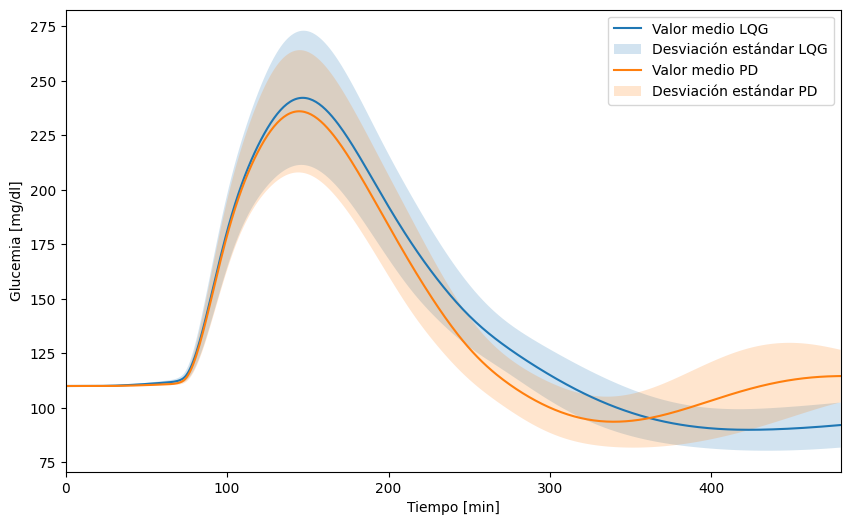

In [5]:
%matplotlib inline
#%matplotlib qt

# Separacion de datos para cada estrategia
lqg = df.iloc[:,0:10]
pd  = df.iloc[:,10:20]
t   = np.arange(0, len(lqg), 1)

# Cálculo del valor medio y desviación estándar de cada una
vm_lqg  = np.mean(lqg,axis=1)
std_lqg = np.std(lqg,axis=1)
vm_pd   = np.mean(pd,axis=1)
std_pd  = np.std(pd,axis=1)

# Presentación de gráficos 
plt.figure(figsize=(10,6))
plt.plot(t,vm_lqg,label='Valor medio LQG')
plt.fill_between(t,vm_lqg-std_lqg,vm_lqg+std_lqg, alpha=0.2, label='Desviación estándar LQG')
plt.plot(t,vm_pd,label='Valor medio PD')
plt.fill_between(t,vm_pd-std_pd,vm_pd+std_pd, alpha=0.2, label='Desviación estándar PD')
plt.xlim(t[0], t[len(lqg)-1])
plt.ylabel("Glucemia [mg/dl]")
plt.xlabel("Tiempo [min]")
plt.legend()
plt.show()

En la figura anterior se observa el valor medio y la desviación estándar de glucemia obtenida con cada estrategia, para el análisis de comparacion se extraen los siguientes valores de interes: 
*   Valor de glucemia antes de la comida (en ayuno)
*   Pico máximo de glucemia en cada paciente debido a la comida.

Estos valores son importantes para observar como se compensa el efecto que tiene la comida en la glucemia al utilizar cada una de las estrategias. 

In [15]:
# Extracción de los puntos de interes para el analisis

# Pico máximo de glucemia de cada paciente con ambas estrategias
lqg_max = lqg.max()
pd_max  = pd.max()
#print(lqg_max,"\n",pd_max)

# Valor de glucemia en ayuno
lqg_ayuno = lqg.iloc[20]
pd_ayuno  = pd.iloc[20]
#print(lqg_ayuno,"\n",pd_ayuno)


# Calculo de las medidas caracteristicas de centralización y dispersión de los datos de interes

# Promedio 
mean_lqg_max   = np.mean(lqg_max)
mean_pd_max    = np.mean(pd_max)
mean_lqg_ayuno = np.mean(lqg_ayuno)
mean_pd_ayuno  = np.mean(pd_ayuno)

# Desviación estándar 
std_lqg_max   = np.std(lqg_max)
std_pd_max    = np.std(pd_max)
std_lqg_ayuno = np.std(lqg_ayuno)
std_pd_ayuno  = np.std(pd_ayuno)

print("Promedio de los valores máximos de glucemia con el LQG: {:.2f} [mg/dl].".format(mean_lqg_max),"Desviacion estándar: {:.2f} [mg/dl]".format(std_lqg_max))
print("Promedio de los valores máximos de glucemia con el PD: {:.2f} [mg/dl].".format(mean_pd_max),"Desviacion estándar: {:.2f} [mg/dl]".format(std_pd_max))
print("Promedio de los valores glucemia en ayuno con el LQG: {:.2f} [mg/dl].".format(mean_lqg_ayuno),"Desviacion estándar: {:.2f} [mg/dl]".format(std_lqg_ayuno))
print("Promedio de los valores glucemia en ayuno con el PD: {:.2f} [mg/dl].".format(mean_pd_ayuno),"Desviacion estándar: {:.2f} [mg/dl]".format(std_pd_ayuno))

Promedio de los valores máximos de glucemia con el LQG: 243.44 [mg/dl]. Desviacion estándar: 29.92 [mg/dl]
Promedio de los valores máximos de glucemia con el PD: 237.45 [mg/dl]. Desviacion estándar: 27.15 [mg/dl]
Promedio de los valores glucemia en ayuno con el LQG: 110.01 [mg/dl]. Desviacion estándar: 0.06 [mg/dl]
Promedio de los valores glucemia en ayuno con el PD: 109.98 [mg/dl]. Desviacion estándar: 0.05 [mg/dl]


A continuación, se realiza el test de normalidad de Shapiro–Wilk el cual tiene las siguientes hipótesis:
 
*   Hipótesis nula (H0): Los datos siguen una distribución normal.
*   Hipótesis alternativa (H1): Los datos no siguen una distribución normal.

Se selecciona un nivel de significancia de $\alpha$ = 0.05. 

Se utiliza este test debido a que la cantidad de observaciones de la cual se dispone es pequeña (10 para cada grupo) y se recomienda su uso cuando el tamaño de la muestra es menor a 50. Sin embargo, para reforzar las conclusiones respecto a la distribucion que siguen los datos, se realiza un histograma para obtener una representación gráfica de la misma.

Se rechaza la hipotesis nula de normalidad para el valor máximo del LQG, por lo tanto no se puede decir que los datos siguen una distribucion normal
Su p valor es:0.03
Se rechaza la hipotesis nula de normalidad para los valores en ayuno del PD, por lo tanto no se puede decir que los datos siguen una distribucion normal
Su p valor es:0.04


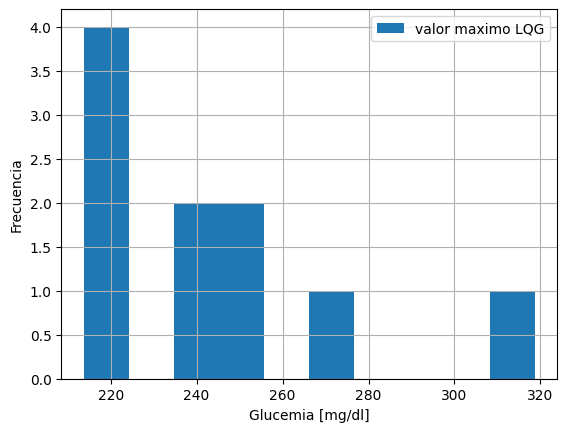

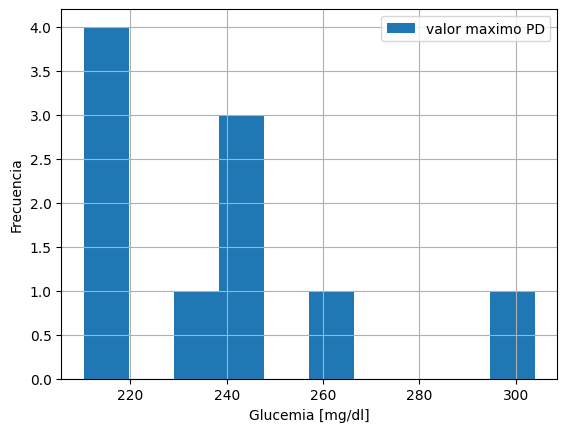

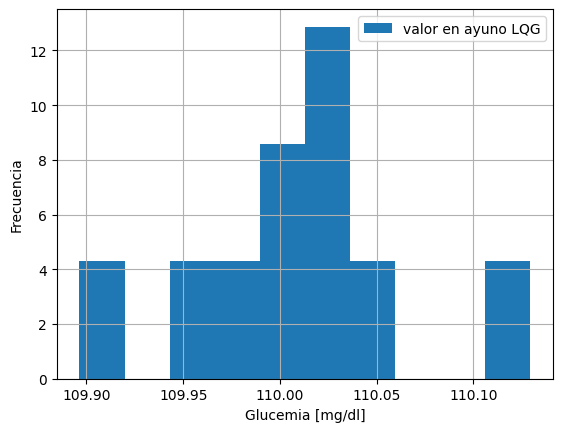

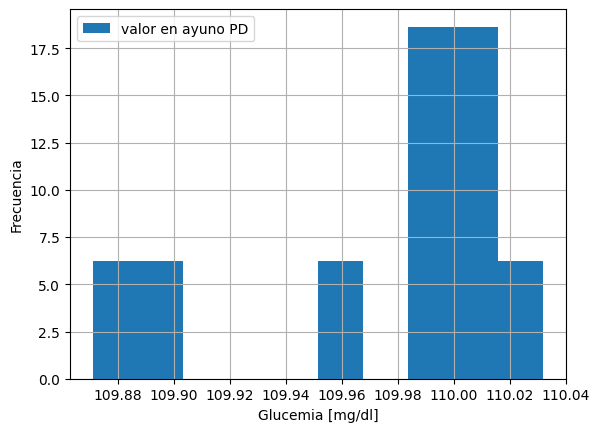

In [17]:
# Distribucion de los puntos de interes
#%matplotlib qt
%matplotlib inline
# Histograma del valor máximo de glucemia en cada grupo
plt.figure()
lqg_max.hist(label="valor maximo LQG")
plt.xlabel('Glucemia [mg/dl]')
plt.ylabel('Frecuencia')
plt.legend()
plt.figure()
pd_max.hist(label="valor maximo PD")
plt.xlabel('Glucemia [mg/dl]')
plt.ylabel('Frecuencia')
plt.legend()

# Test de normalidad de Shapiro-Wilk
estadistico_lqg_max, p_valor_lqg_max = ss.shapiro(lqg_max)
if p_valor_lqg_max<0.05:   
    print("Se rechaza la hipotesis nula de normalidad para el valor máximo del LQG, por lo tanto no se puede decir que los datos siguen una distribucion normal")
    print("Su p valor es:{:.2f}".format(p_valor_lqg_max))

stadistico_pd_max, p_valor_pd_max = ss.shapiro(pd_max)
if p_valor_pd_max<0.05:
    print("Se rechaza la hipotesis nula de normalidad para el valor máximo del PD, por lo tanto no se puede decir que los datos siguen una distribucion normal")
    print("Su p valor es:{:.2f}".format(p_valor_pd_max))

# Histograma de los valores de glucemia en ayuno
plt.figure()
lqg_ayuno.hist(label="valor en ayuno LQG", density=True)
plt.xlabel('Glucemia [mg/dl]')
plt.ylabel('Frecuencia')
plt.legend()
plt.figure()
pd_ayuno.hist(label="valor en ayuno PD", density=True)
plt.xlabel('Glucemia [mg/dl]')
plt.ylabel('Frecuencia')
plt.legend()

# Test de normalidad de Shapiro-Wilk
estadistico_lqg_ayuno, p_valor_lqg_ayuno = ss.shapiro(lqg_ayuno)
if p_valor_lqg_ayuno<0.05:   
    print("Se rechaza la hipotesis nula de normalidad para los valores en ayuno del LQG, por lo tanto no se puede decir que los datos siguen una distribucion normal")
    print("Su p valor es: {:.2f}".format(p_valor_lqg_ayuno))
stadistico_pd_ayuno, p_valor_pd_ayuno = ss.shapiro(pd_ayuno)
if p_valor_pd_ayuno<0.05:
    print("Se rechaza la hipotesis nula de normalidad para los valores en ayuno del PD, por lo tanto no se puede decir que los datos siguen una distribucion normal")
    print("Su p valor es:{:.2f}".format(p_valor_pd_ayuno))

El test de Shapiro-Wilk da como resultado que, en al menos uno de los grupos de cada parametro, no se puede afirmar que los datos siguen una distribución nomal. Además, se observa en el histograma de cada uno que efectivamente los valores que más se repiten se encuentran desplazados del centro. Por lo tanto se debe realizar una prueba no parametrica para comparar diferencias en los grupos.

Se realiza el test de levene para evaluar si las distribuciones de varianzas es similar entre los grupos.
* Hipotesis nula (H0) : los datos tienen la misma distribucion de varianzas
* Hipotesis alternativa (H1) : los datos tienen una distribucion de varianzas distinta

In [18]:
#Si el valor p de la prueba de Levene es superior a 0,05, las varianzas no son significativamente diferentes entre 
#sí (es decir, se cumple el supuesto de homogeneidad de la varianza). 
#Si el valor p de la prueba de Levene es inferior a 0,05, entonces existe una diferencia significativa entre las varianzas. 
estadistico,p_valor =  ss.levene(lqg_max,pd_max)
if p_valor<0.05:
    print("Se rechaza la hipotesis nula. Existe una diferencia significativa entre la varianza de los grupos del valor máximo con p valor: {:.2f}".format(p_valor))
estadistico,p_valor = ss.levene(lqg_ayuno,pd_ayuno)
if p_valor<0.05:
    print("Se rechaza la hipotesis nula. Existe una diferencia significativa entre la varianza de los grupos del valor en ayuno con p valor: {:.2f}".format(p_valor))

Segun el test de levene, las varianzas de los grupos son similares para ambos parámetros (valor máximo y en ayuno).


El test de wilcoxon se utiliza para comparar muestras pareadas en datos no paramétricos